# Двудольные графы

В этом ноутбуке мы посмотрим как работать с двудольными графами

In [1]:
# Заводим двудольный граф

import networkx as nx
from networkx.algorithms import bipartite

B = nx.Graph()

B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(["a", "b", "c"], bipartite=1)

B.add_edges_from([(1, "a"), (1, "b"), (1,"c"), (2, "b"), (2, "c"), (3, "c"), (4, "a")])

dict(B.nodes())

{1: {'bipartite': 0},
 2: {'bipartite': 0},
 3: {'bipartite': 0},
 4: {'bipartite': 0},
 'a': {'bipartite': 1},
 'b': {'bipartite': 1},
 'c': {'bipartite': 1}}

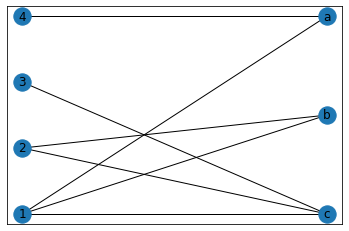

In [2]:
# Рисуем граф

top = nx.bipartite.sets(B)[0]
nx.draw_networkx(B,nx.bipartite_layout(B,top))

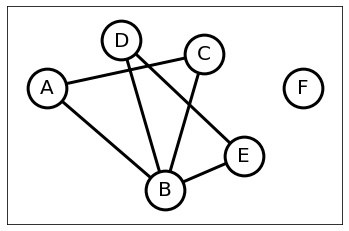

In [3]:
# Заводим обычный граф

import matplotlib.pyplot as plt

graph = nx.Graph()

graph.add_nodes_from(['A','B','C','D','E','F'])
graph.add_edges_from([('A','B'), ('B','C'), ('C','A'),('B','D'),('B','E'),('D','E')])

pos = {'A': (1, 1.5), 'B': (4, 0), 'C': (5, 2), 'D': (2.9, 2.2), 'E': (6, 0.5), 'F': (7.5, 1.5)}


def draw_G():
    options = {
        "font_size": 20,
        "node_size": 1500,
        "node_color": "white",
        "edgecolors": "black",
        "linewidths": 3,
        "width": 3,
    }

    plt.axis([0, 8.5, -0.5, 2.7])
    nx.draw_networkx(graph, pos, **options)
    plt.show()
    

draw_G()

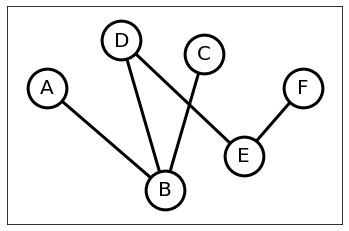

True


In [4]:
# Проверяем граф на двудольность

graph.remove_edges_from([('A','C'),('B','E')])
graph.add_edge('E','F')

draw_G()

print(bipartite.is_bipartite(graph))

{'A': {'bipartite': 1},
 'B': {'bipartite': 0},
 'C': {'bipartite': 1},
 'D': {'bipartite': 1},
 'E': {'bipartite': 0},
 'F': {'bipartite': 1}}

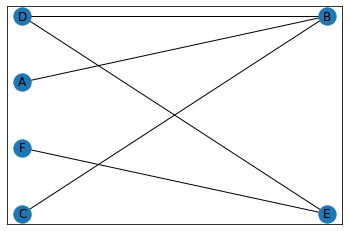

In [5]:
# Делим вершины на доли

colors = bipartite.color(graph)

nx.set_node_attributes(graph, colors, "bipartite")

top = nx.bipartite.sets(graph)[0]
nx.draw_networkx(graph,nx.bipartite_layout(graph,top))

dict(graph.nodes())